In [12]:
import pandas as pd
import os
import statistics
import matplotlib.pyplot as plt

In [3]:
files = []
i=0
for root, dirs, filenames in os.walk(os.curdir):
    for file in filenames:
        if file.endswith('.csv'):
            files.append(os.path.join(root, file))

# Reviso que las columnas estén bien
for file in files:
    with open(file, 'r') as f:
        header = f.readline().strip()
    columns = header.split(',')    
    if len(columns) < 13:
        header += ',A,B'

        with open(file, 'r') as f:
            lines = f.readlines()[1:]  # Omitir el encabezado original

        # Sobrescribir el archivo con el nuevo encabezado y el resto del contenido
        with open(file, 'w') as f:
            f.write(header + '\n')  # Escribe el nuevo encabezado
            f.writelines(lines)  # Escribe las líneas originales sin cambios

In [4]:
# Lee todos los archivos CSV en un diccionario de DataFrames
dataframes = {file: pd.read_csv(file) for file in files}

In [5]:
dataframes = []
for root, dirs, filenames in os.walk(os.getcwd()):
    for file in filenames:
        if file.endswith('.csv'):
            filepath = os.path.join(root, file)
            df = pd.read_csv(filepath)

            # Verificar si el DataFrame tiene al menos 12 columnas (índice 11)
            if df.shape[1] > 11:
                # Verificar si la columna 12 (índice 11) se llama 'A'
                if df.columns[11] != 'A':
                    # Renombrar la columna en el índice 11 a 'A'
                    df.columns.values[11] = 'A'
                if df.columns[12] != 'B':
                    # Renombrar la columna en el índice 11 a 'A'
                    df.columns.values[12] = 'B'

            dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
combined_df = pd.concat(dataframes, ignore_index=True)

# Imprimir el resultado final para verificar
df = combined_df

/tmp/ipykernel_7298/3952048389.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dataframes, ignore_index=True)


In [6]:
# Filtrar las filas donde 'subid' empieza con 'C'
df_C = df[df['subid'].str.startswith('C')]

# Filtrar las filas donde 'subid' empieza con 'N'
df_N = df[df['subid'].str.startswith('N')]

# Ahora tienes dos DataFrames: uno con valores que empiezan con 'C' y otro con 'N'
print("DataFrame con subid que empiezan con 'C':")
print(df_C.head())

print("\nDataFrame con subid que empiezan con 'N':")
print(df_N.head())

DataFrame con subid que empiezan con 'C':
    subid etapa ntrial estim correct  response_time  cumulative_response_time  \
150   C24     1      1    g2       1          0.784                     1.035   
151   C24     1      2    r2       1          0.637                     2.239   
152   C24     1      3    g1       1          0.518                     3.535   
153   C24     1      4    g7       1            NaN                       NaN   
154   C24     1      5    g6       1            NaN                       NaN   

    fixation_onset fixation_dur stim_onset stim_dur    A    B  
150              0           12         15       66   82  120  
151              0           12         15       70   86  120  
152              0           12         15       87  103   60  
153              0           12         15       62   78  120  
154              0           12         15       82   98   60  

DataFrame con subid que empiezan con 'N':
  subid etapa ntrial estim correct  response

In [7]:
df_C1 = df_C[df_C['etapa']==1]
df_C2 = df_C[df_C['etapa']==2]
df_C3 = df_C[df_C['etapa']==3]
df_N1 = df_N[df_N['etapa']==1]
df_N2 = df_N[df_N['etapa']==2]
df_N3 = df_N[df_N['etapa']==3]

In [10]:
#rt es response time
#pr es promediado

rt_df_C1 = df_C1['response_time'].dropna()
pr_rt_df_C1 = rt_df_C1.mean()

rt_df_C2 = df_C2['response_time'].dropna()
pr_rt_df_C2 = rt_df_C2.mean()

In [11]:
# rt es response time, pr es promediado

rt_df_C1 = df_C1['response_time'].dropna()
pr_rt_df_C1 = rt_df_C1.mean()

rt_df_C2 = df_C2['response_time'].dropna()
pr_rt_df_C2 = rt_df_C2.mean()

rt_df_C3 = df_C3['response_time'].dropna()
pr_rt_df_C3 = rt_df_C3.mean()

rt_df_N1 = df_N1['response_time'].dropna()
pr_rt_df_N1 = rt_df_N1.mean()

rt_df_N2 = df_N2['response_time'].dropna()
pr_rt_df_N2 = rt_df_N2.mean()

rt_df_N3 = df_N3['response_time'].dropna()
pr_rt_df_N3 = rt_df_N3.mean()

C1: Promedio de response_time = 0.44
C2: Promedio de response_time = 0.38
C3: Promedio de response_time = 0.48
N1: Promedio de response_time = 0.46
N2: Promedio de response_time = 0.39
N3: Promedio de response_time = 0.48


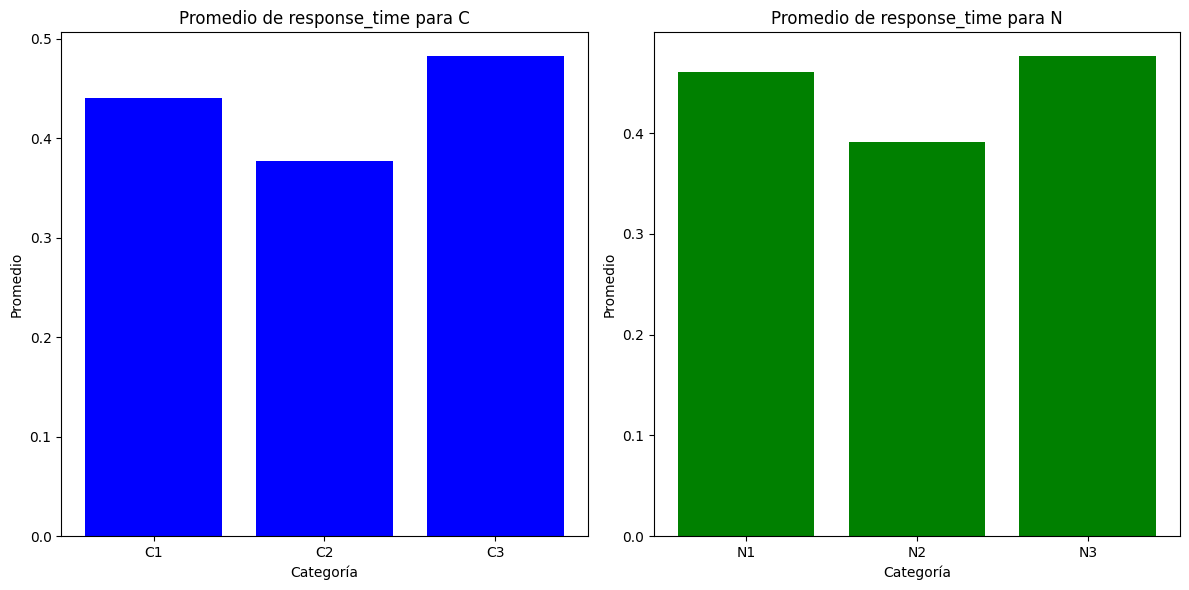

In [13]:
categories_C = ['C1', 'C2', 'C3']
values_C = [pr_rt_df_C1, pr_rt_df_C2, pr_rt_df_C3]

categories_N = ['N1', 'N2', 'N3']
values_N = [pr_rt_df_N1, pr_rt_df_N2, pr_rt_df_N3]

# Crear gráfico de barras para C
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(categories_C, values_C, color='blue')
plt.title('Promedio de response_time para C')
plt.xlabel('Categoría')
plt.ylabel('Promedio')

# Crear gráfico de barras para N
plt.subplot(1, 2, 2)
plt.bar(categories_N, values_N, color='green')
plt.title('Promedio de response_time para N')
plt.xlabel('Categoría')
plt.ylabel('Promedio')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [15]:
pr_correct_df_C1 = df_C1['correct'].mean()
pr_correct_df_C2 = df_C2['correct'].mean()
pr_correct_df_C3 = df_C3['correct'].mean()
pr_correct_df_N1 = df_N1['correct'].mean()
pr_correct_df_N2 = df_N2['correct'].mean()
pr_correct_df_N3 = df_N3['correct'].mean()

In [17]:
print(f"C1: {pr_correct_df_C1 * 100:.2f}%")
print(f"C2: {pr_correct_df_C2 * 100:.2f}%")
print(f"C3: {pr_correct_df_C3 * 100:.2f}%")
print(f"N1: {pr_correct_df_N1 * 100:.2f}%")
print(f"N2: {pr_correct_df_N2 * 100:.2f}%")
print(f"N3: {pr_correct_df_N3 * 100:.2f}%")

C1: 94.87%
C2: 99.27%
C3: 93.73%
N1: 94.44%
N2: 98.59%
N3: 96.00%


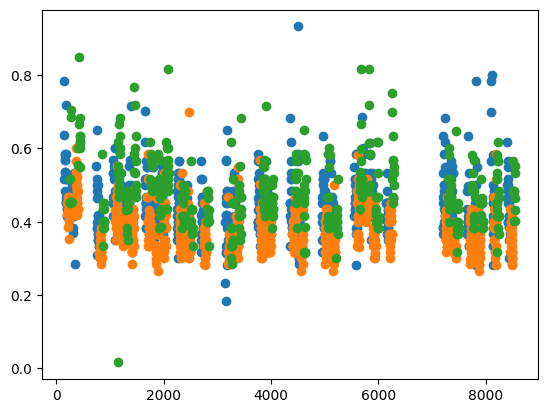

In [22]:
plt.scatter(rt_df_C1.index,rt_df_C1)
plt.scatter(rt_df_C2.index,rt_df_C2)
plt.scatter(rt_df_C3.index,rt_df_C3)